In [1]:
from src import *

In [2]:
from test.test_maps import *

#draw_maps()

In [3]:
from test.test_sensor import *

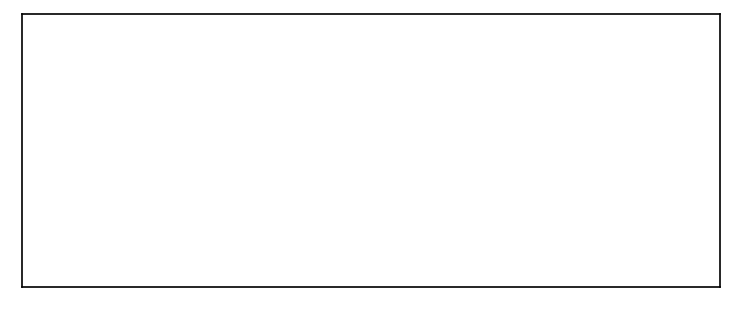

In [4]:
draw(sensor_maps[3])

In [5]:
from src.A_star_Replanning.a_star_replanning import *

In [6]:
p, _, _ = a_star_replanning(sensor_maps[3], (0,0), (24, 63))

TypeError: 'int' object is not callable